In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()   #to find if any entry is null

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns

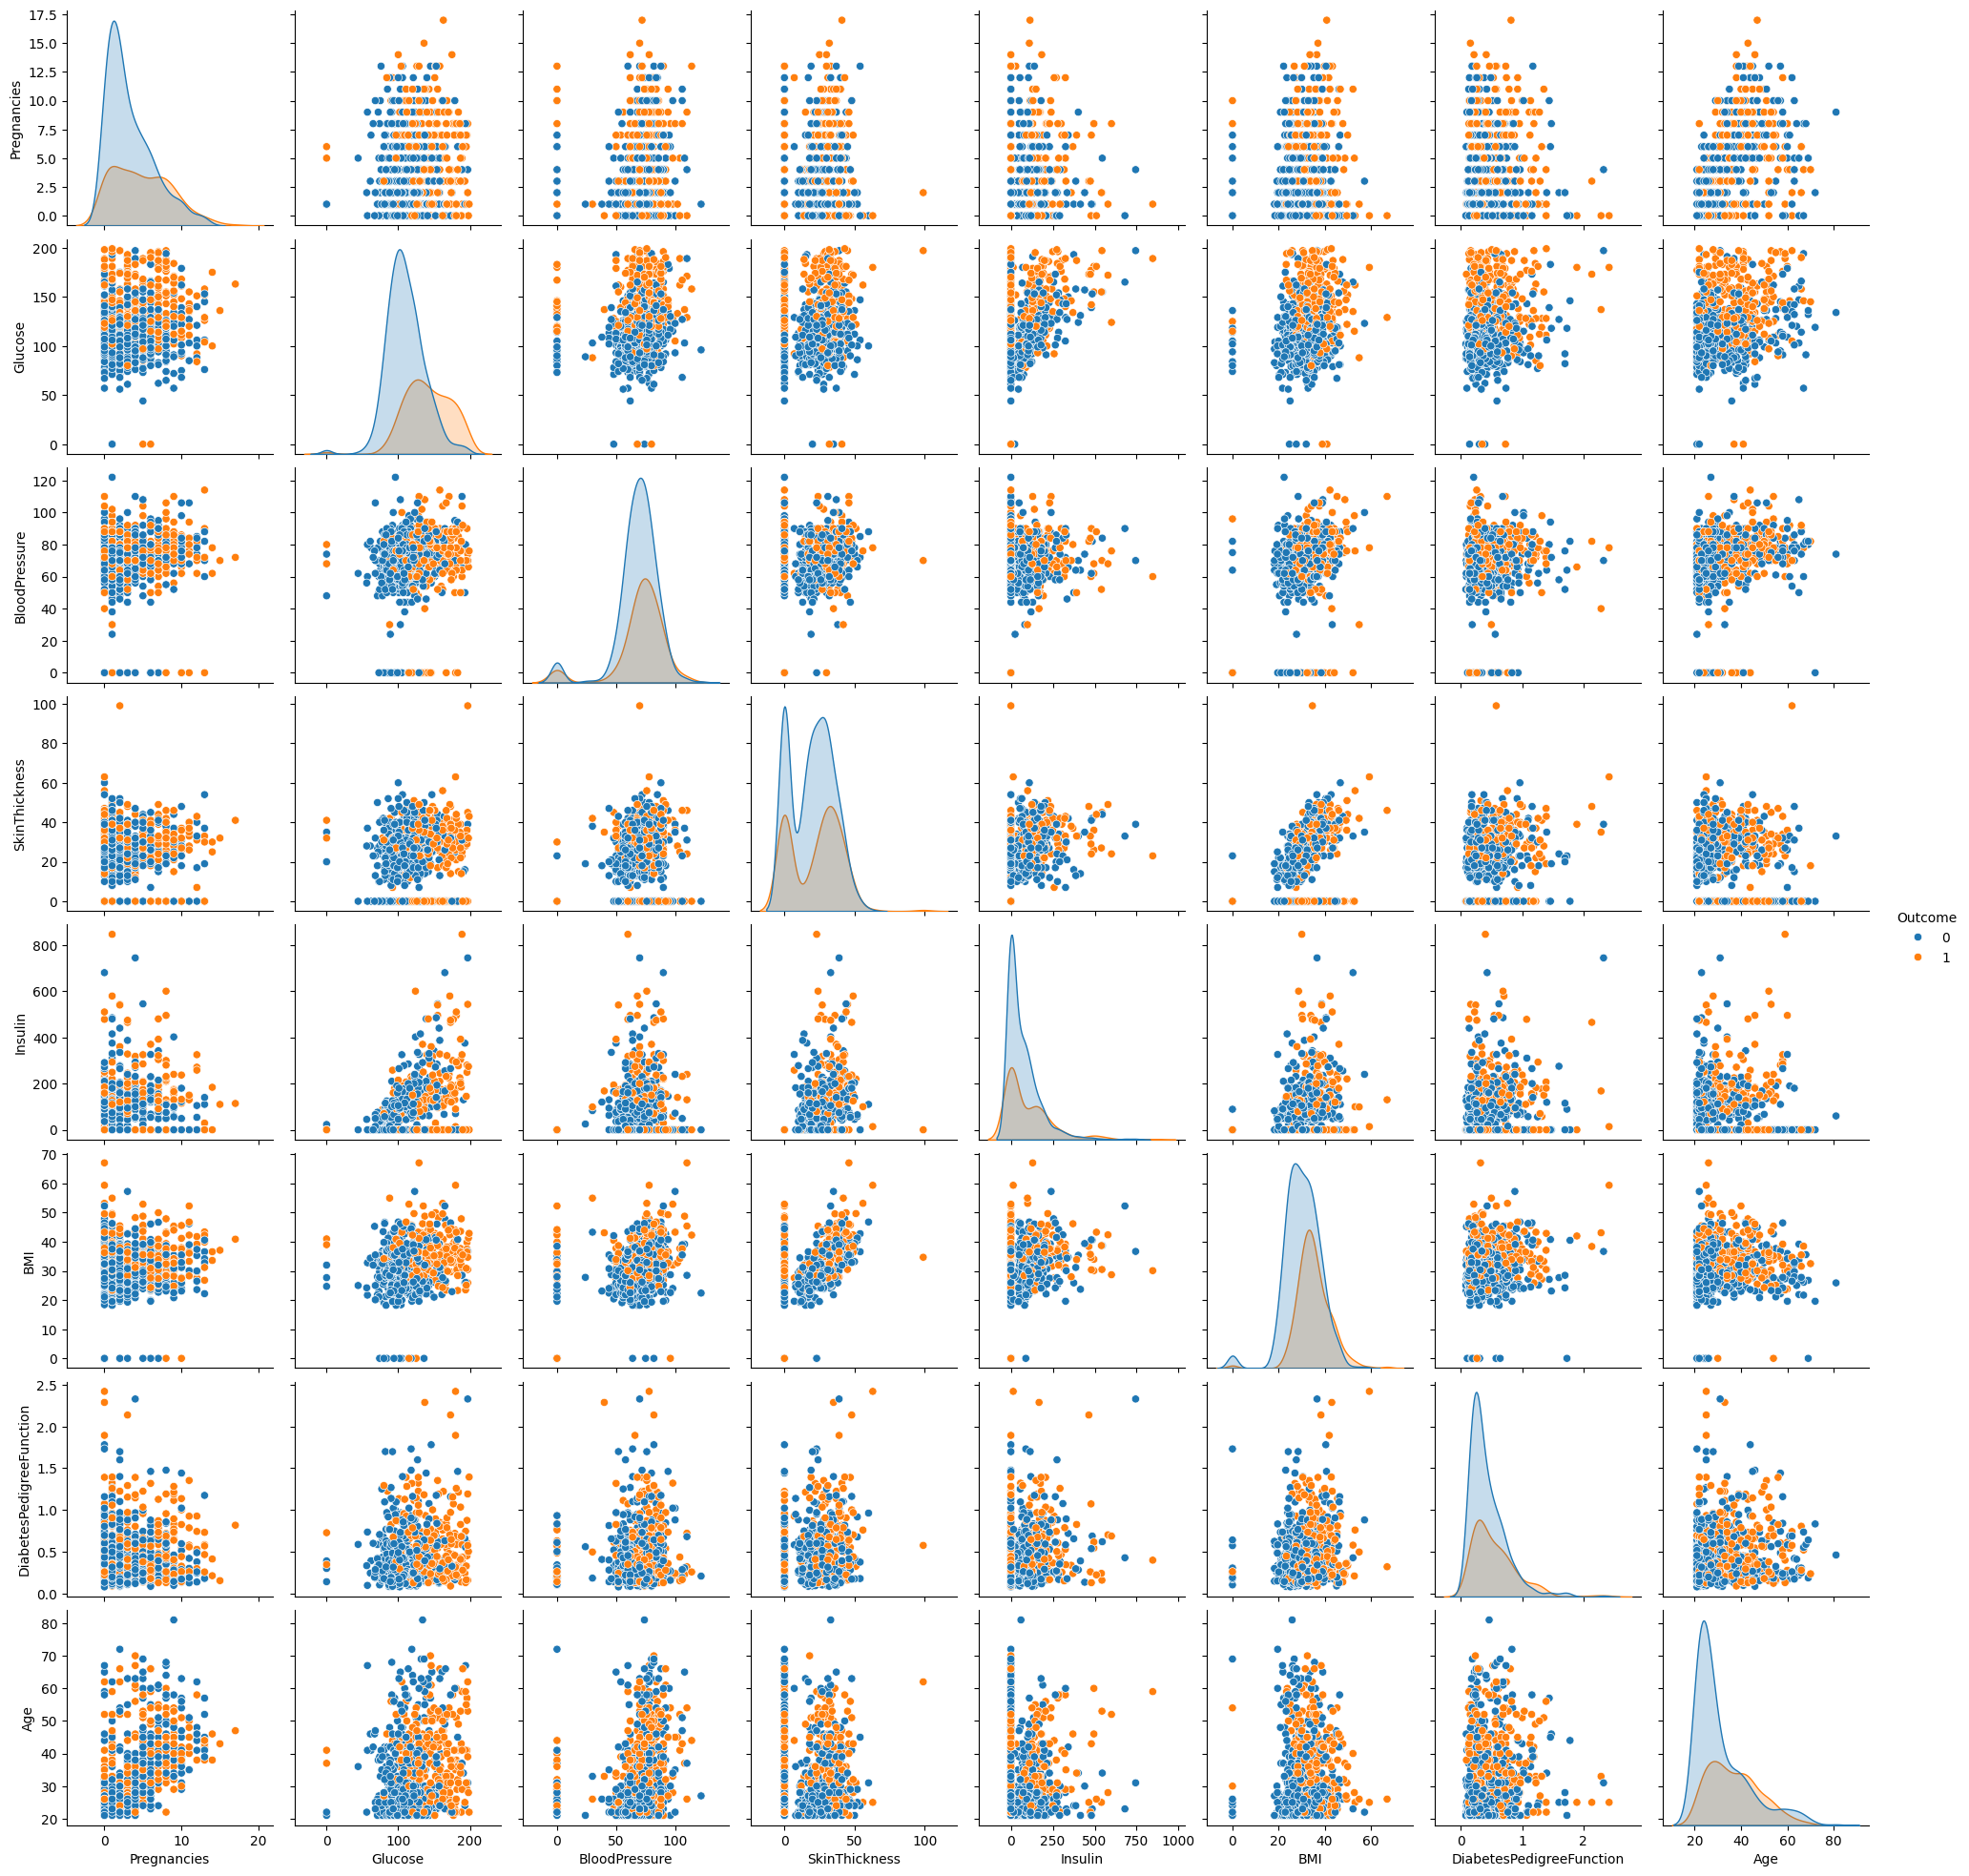

In [5]:
sns.pairplot(df,hue="Outcome")

In [6]:
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","Non-Diabetic")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


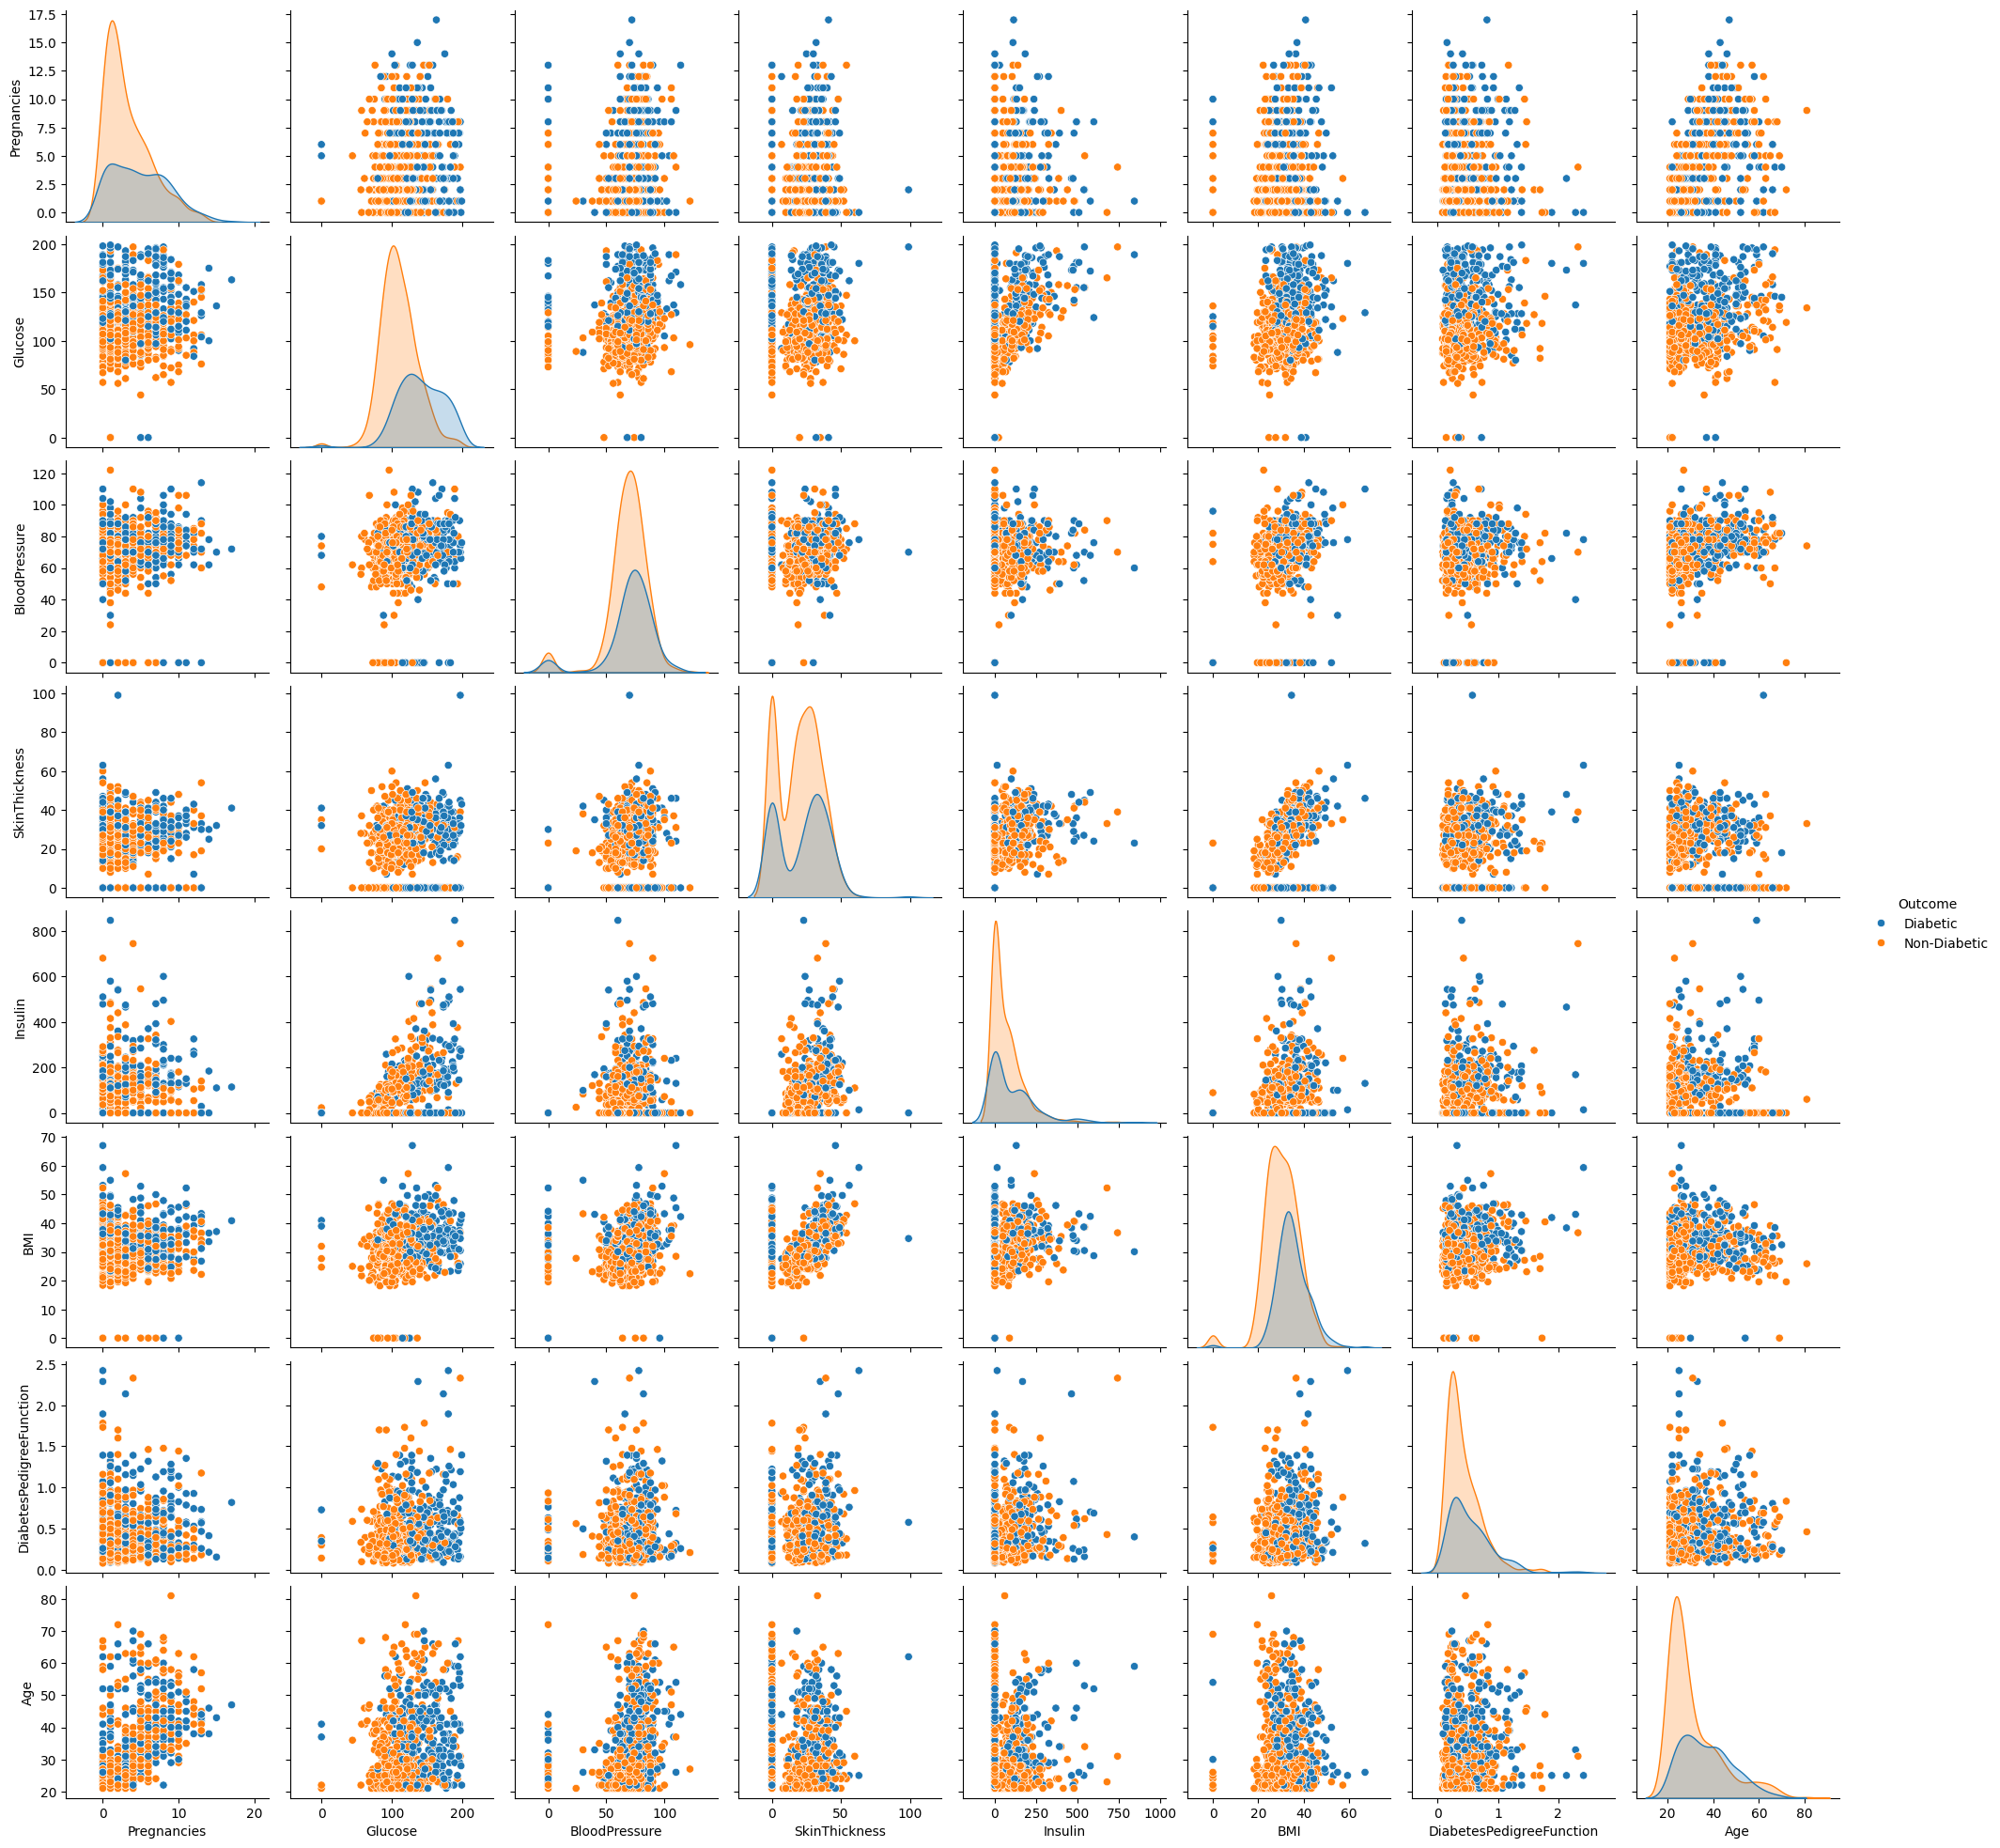

In [8]:
sns.pairplot(df,hue="Outcome")

In [9]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X=df.drop('Outcome',axis=1).values  ### Independent features
y=df['Outcome'].values    ### Dependent features

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
### Creating tensors
X_train=torch.FloatTensor(X_train)  # Remember that independent features always need to be stores as float tensors
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [13]:
df.shape

(768, 9)

# Building the Model

In [14]:
class ANN_Model(nn.Module):
  def __init__(self,in_features=8,hidden1=20,hidden2=20,out_features=2):
    super().__init__()
    self.fc1=nn.Linear(in_features,hidden1)
    self.fc2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,out_features)


  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x


In [15]:
### Instantiate the ANN_Model
torch.manual_seed(20)
model=ANN_Model()

In [16]:

model.parameters

<bound method Module.parameters of ANN_Model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [17]:
### Backward propagation Define the Loss Function and the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [18]:
epochs=500
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model.forward(X_train)
  loss=loss_function(y_pred,y_train)
  final_losses.append(loss.detach().numpy())

  if i%10==0:
    print("Epoch {} has loss: {}".format(i,loss.item()))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 10 has loss: 0.6956124305725098
Epoch 20 has loss: 0.6048516631126404
Epoch 30 has loss: 0.5922861099243164
Epoch 40 has loss: 0.5688304305076599
Epoch 50 has loss: 0.5538846254348755
Epoch 60 has loss: 0.5422552227973938
Epoch 70 has loss: 0.5321903824806213
Epoch 80 has loss: 0.5231794118881226
Epoch 90 has loss: 0.5144451856613159
Epoch 100 has loss: 0.5063003301620483
Epoch 110 has loss: 0.5002337694168091
Epoch 120 has loss: 0.49580785632133484
Epoch 130 has loss: 0.48301786184310913
Epoch 140 has loss: 0.47669103741645813
Epoch 150 has loss: 0.4764285087585449
Epoch 160 has loss: 0.4807022511959076
Epoch 170 has loss: 0.4635736048221588
Epoch 180 has loss: 0.45706707239151
Epoch 190 has loss: 0.4500112533569336
Epoch 200 has loss: 0.4432915449142456
Epoch 210 has loss: 0.4396951198577881
Epoch 220 has loss: 0.4456348121166229
Epoch 230 has loss: 0.4343872666358948
Epoch 240 has loss: 0.4294256567955017
Epoch 250 has loss: 0.43362143635749817
Epoch 260 has loss: 0.4417913556

Text(0, 0.5, 'loss')

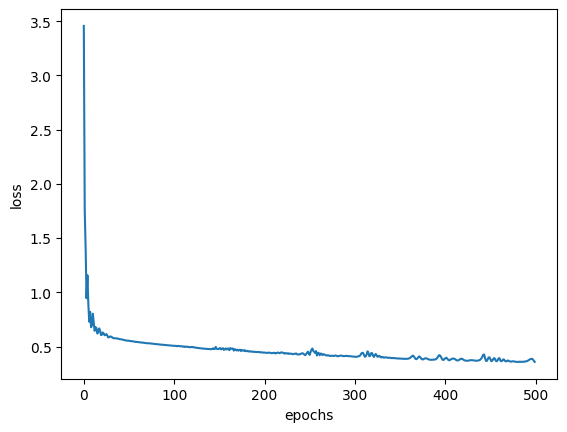

In [19]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs),final_losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [20]:
### Predictions in X_test data
predictions=[]
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_pred=model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())


1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [21]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [15, 32]])

Text(95.72222222222221, 0.5, 'Pedicted values')

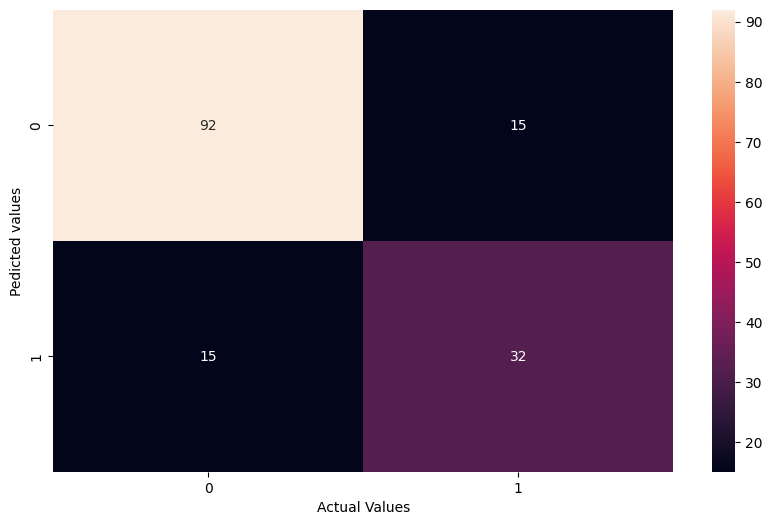

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel("Pedicted values")

In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.8051948051948052

In [25]:
### Save the model
torch.save(model,'diabetes.pt')

In [26]:
model=torch.load('diabetes.pt')

In [27]:
model.eval()

ANN_Model(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [28]:
### Prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [29]:
### New data
list1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [30]:
new_data=torch.Tensor(list1)

In [31]:
with torch.no_grad():
  print(model(new_data))
  print(model(new_data).argmax().item())

tensor([1.0276, 1.5889])
1
